# Task 4: Housing Prices Prediction Project 

##Project idea – The dataset has house prices of the Boston residual areas.The expense of the house varies according to various factors like crime rate, number of rooms, etc. It is a good ML project for beginners to predict prices on the basis of new data.

#Dataset: https://bit.ly/3uU4dtg


In [ ]:
##import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [ ]:
## reading the dataset
hd=pd.read_csv("/content/hhousig dataset.csv")

In [ ]:
hd.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
## head method using for first 5 rows to show
hd.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
hd.shape # shape of dataset

(506, 14)

In [ ]:
hd.describe()  # stats of data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
## checking the null values or missing values
hd.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
##remove the target variable from the trainng data and save it to another variable called x
x=hd.iloc[:,:-1]

In [ ]:
##now save the target (label) in y
y=hd.iloc[:,-1]

In [ ]:
## feature selection
bestfeatures=SelectKBest(score_func=f_regression, k=10)
fit=bestfeatures.fit(x,y)

In [ ]:
## feature selection with scores
dfscore=pd.DataFrame(fit.scores_)
dfcol=pd.DataFrame(x.columns)

In [ ]:
##visual form of scores and target column
fs=pd.concat([dfcol,dfscore],axis=1)
fs.columns=['House Features','Score']

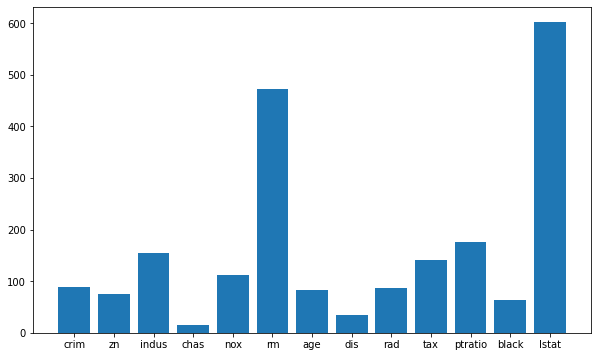

In [ ]:
S=fs['Score']
T=fs['House Features']

plt.figure(figsize=(10,6))
plt.bar(T,S)
plt.show()

In [ ]:
T=x.loc[:,['indus','nox','rm','tax','ptratio','lstat']] # T is the variable where all best features are selected

In [ ]:
T.head() # T head is done within best features

,indus,nox,rm,tax,ptratio,lstat
0,2.31,0.538,6.575,296,15.3,4.98
1,7.07,0.469,6.421,242,17.8,9.14
2,7.07,0.469,7.185,242,17.8,4.03
3,2.18,0.458,6.998,222,18.7,2.94
4,2.18,0.458,7.147,222,18.7,5.33


In [ ]:
## train the data so here T is featured coulmn which is selected and train the model with feature selection
T_train,T_test,y_train,y_test=train_test_split(T,y,test_size=0.2,random_state=0)

In [ ]:
reg=LinearRegression() # linear reg

In [ ]:
reg.fit(T_train,y_train)

LinearRegression()

In [ ]:
Prediction=reg.predict(T_test)
print(Prediction)

[26.89461483 21.08277585 27.06442945 11.63641554 22.79764445 20.26978028
 18.85725174 21.54240705 17.13755925 21.57152167 13.97323102 17.09519785
 16.95420858  4.04997978 39.4186277  34.14043287 20.92147767 38.01232933
 29.68597971 22.22629511 25.28627424 25.52392977 18.52133318 27.92987706
 22.56673784  8.5394508  18.06629351 21.85164948 35.84236856 19.92359351
 16.57704026 17.49229787 23.31430293 24.31456465 27.17005492 16.0726553
 10.8550327  19.75871802 17.61869679 13.4190764  27.73632769 20.9816045
 25.13462078 13.22330159 27.94931103 26.44623148 22.44210621 24.086263
 11.20181429 23.64739459 24.241608   16.28301755 23.12250641 35.88445907
 15.19054925 22.98405451 22.25672206 20.61284502 18.84088752 19.30503713
 23.2911243  22.20890319 32.69670301 29.79543058 16.28197038 31.40429268
 18.49125979 22.70629098 18.7206735  22.32854327 23.20136472 24.8108983
 29.58811994 30.20954164 24.76470872  3.68011498 37.29578417 24.22946495
 26.15041503 18.66263067 29.22854359 19.73649546 16.8993

In [ ]:
print(y_test)

329    22.6
371    50.0
219    23.0
403     8.3
78     21.2
       ... 
56     24.7
455    14.1
60     18.7
213    28.1
108    19.8
Name: medv, Length: 102, dtype: float64


In [ ]:
Result=mean_squared_error(y_test,Prediction) # value of MSE means how much accuarte the points are lying on the label data

In [ ]:
Result/100 # so it is 42.65 means that i have done with feature selection so it comes upto 0.42% so we can imagine what the result will be without feature selection. 

0.4265194249458759

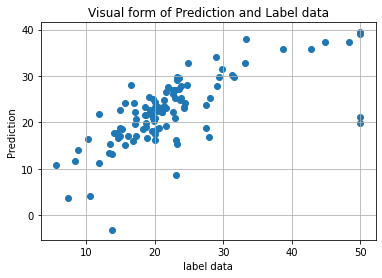

In [ ]:
plt.title("Visual form of Prediction and Label data")
plt.xlabel("label data")
plt.ylabel("Prediction")
plt.scatter(y_test,Prediction)
plt.grid()
plt.show()